## Deep Learning Assignment-2 Practice


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy 
from PIL import Image
from scipy import ndimage
from sklearn import datasets 

In [2]:
# Loading the datasets

digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))

train_set_x_orig = []
train_set_y = []
test_set_x_orig = []
test_set_y = []
classes = ["even","odd"]

In [3]:
# Setting the testset size
data_size = len(images_and_labels)
test_set_size = 350

In [4]:
# Splitting the data into training and test sets and assigning the labels: Even (0), Odd (1)

for i in range(len(images_and_labels)-test_set_size):
    train_set_x_orig.append(images_and_labels[i][0])
    if images_and_labels[i][1] %2 == 0: # if even label zero
        train_set_y.append(0)
    else: # if odd label 1
        train_set_y.append(1)

for i in range(len(images_and_labels)-test_set_size, len(images_and_labels)):
    test_set_x_orig.append(images_and_labels[i][0])
    if images_and_labels[i][1] % 2 == 0: # if even label zero
        test_set_y.append(0)
    else: # if odd label 1
        test_set_y.append(1)

In [5]:
print(len(train_set_y))
print(len(test_set_y))

1447
350


In [6]:
train_set_x_orig = np.array(train_set_x_orig)
train_set_y = np.array(train_set_y)
test_set_x_orig = np.array(test_set_x_orig)
test_set_y = np.array(test_set_y)

In [7]:
train_set_y.shape


(1447,)

In [8]:
train_set_x_orig.shape

(1447, 8, 8)

In [9]:
print(train_set_x_orig.shape, train_set_y.shape, test_set_x_orig.shape, test_set_y.shape)

(1447, 8, 8) (1447,) (350, 8, 8) (350,)


y = 0, it's a 'even' number.


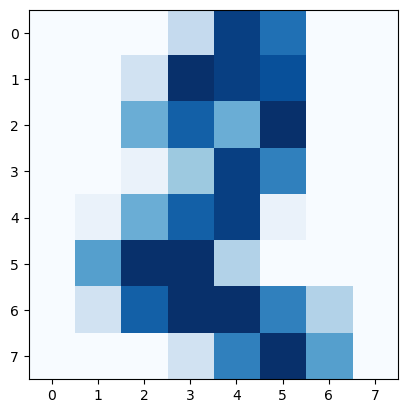

In [25]:
# Display an example from the data

index = 2
plt.imshow(train_set_x_orig[index],cmap='Blues', vmin=0, vmax=16)
print("y = " + str(train_set_y[index]) + ", it's a '" + classes[train_set_y[index]] +  "' number.")

In [24]:
# Description of Data

m_train = train_set_y.shape[0]
m_test = test_set_y.shape[0]
num_px = train_set_x_orig.shape[2]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ")")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 1447
Number of testing examples: m_test = 350
Height/Width of each image: num_px = 8
Each image is of size: (8, 8)
train_set_x shape: (1447, 8, 8)
train_set_y shape: (1447,)
test_set_x shape: (350, 8, 8)
test_set_y shape: (350,)


In [28]:
# Dataset description
print(digits.DESCR.strip())

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [37]:
# Reshape the training and test examples from 2D matrix to a 1D vector. The input vector of a fully connected neural network is always 1D
train_set_x_flatten = train_set_x_orig.reshape(m_train,(num_px*num_px))
test_set_x_flatten = test_set_x_orig.reshape(m_test,(num_px*num_px))

In [39]:
# ndim for checking dimension of numpy array, shape for checking shape, size for checking size (x*y*z), len()
print(train_set_x_flatten.ndim)
print(train_set_x_flatten.shape)
print(train_set_x_flatten.size)
print(len(train_set_x_flatten))


2
(1447, 64)
92608
1447


In [41]:
# Print the description after reshaping
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print(train_set_y.ndim)

train_set_x_flatten shape: (1447, 64)
train_set_y shape: (1447,)
test_set_x_flatten shape: (350, 64)
test_set_y shape: (350,)
1


In [43]:
# Not Standardizing I am normalizing the pixel value
train_set_x = train_set_x_flatten/16.
test_set_x = test_set_x_flatten/16.

In [44]:
# complete the function sigmoid activation:
def sigmoid(z):

    s= 1/(1+np.exp(-z))
    return s